# News Mood
Observable Trend 1: CBS had a more positive overall sentiment than the other news twitter accounts.
Observable Trend 2: CNN, Fox News, and The New York Times tends remain neutral in overall sentiment.
Observable Trend 3: BBC and CBS have more positive overall sentiment than CNN, Fox News, and The New York Times

In [122]:
#import dependencies

import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [123]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [124]:
#Pull last 100 tweets from each outlet.
target_user = ["@bbc", "@cbs", "@cnn", "@foxnews", "@nytimes"]

#oldest_tweet = None

sentiments = []

for target in target_user:
    
    counter = 1
    
    for x in range(1, 6):
        
        public_tweets = api.user_timeline(target, page=x)
#Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            user = tweet["user"]["name"]
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            #oldest_tweet = tweet['id'] - 1

            sentiments.append({"User": user,
                               "Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            counter += 1

In [135]:
#Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.

sentiments_pd = pd.DataFrame(sentiments, columns=["User", "Date", "Text", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"])
sentiments_pd.count()

#Export the data in the DataFrame into a CSV file.
sentiments_pd.to_csv("sentiments.csv", encoding="utf-8", index=False)
sentiments_pd.head()

,User,Date,Text,Compound,Positive,Neutral,Negative,Tweets Ago
0,BBC,Wed Jun 13 19:03:07 +0000 2018,Anatomist @theAliceRoberts embarks on a quest ...,0.0000,0.000,0.000,1.000,1
1,BBC,Wed Jun 13 18:28:04 +0000 2018,Discover the story of how Kensington became th...,-0.4005,0.000,0.137,0.863,2
2,BBC,Wed Jun 13 18:01:04 +0000 2018,😁 Russian workers being taught how to smile mo...,0.3612,0.161,0.000,0.839,3
3,BBC,Wed Jun 13 16:30:31 +0000 2018,RT @BBCOne: There are some ingredients that ev...,0.6369,0.181,0.000,0.819,4
4,BBC,Wed Jun 13 16:25:17 +0000 2018,RT @BBCiPlayer: Witness the might of female fa...,-0.4019,0.000,0.163,0.837,5


In [136]:
bbc_df = sentiments_pd.loc[(sentiments_pd["User"] == "BBC")]
cbs_df = sentiments_pd.loc[(sentiments_pd["User"] == "CBS")]
cnn_df = sentiments_pd.loc[(sentiments_pd["User"] == "CNN")]
fox_df = sentiments_pd.loc[(sentiments_pd["User"] == "Fox News")]
nytimes_df = sentiments_pd.loc[(sentiments_pd["User"] == "The New York Times")]

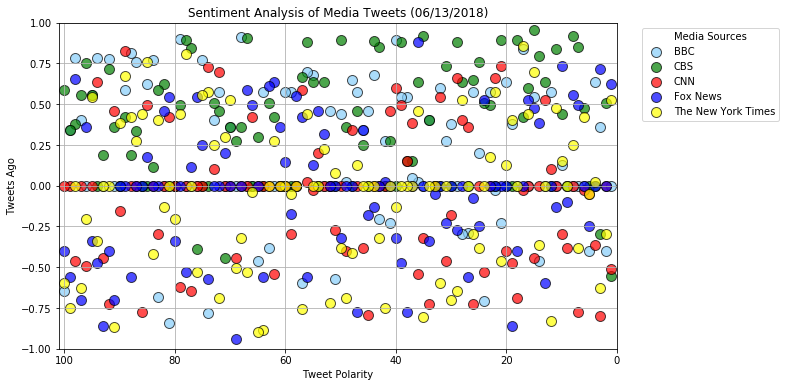

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound"], s=100, alpha=0.7, marker="o", c="lightskyblue", edgecolors="black", label="BBC")
plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound"], s=100, alpha=0.7, marker="o", c="green", edgecolors="black", label="CBS")
plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], s=100, alpha=0.7, marker="o", c="red", edgecolors="black", label="CNN")
plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"], s=100, alpha=0.7, marker="o", c="blue", edgecolors="black", label="Fox News")
plt.scatter(nytimes_df["Tweets Ago"], nytimes_df["Compound"], s=100, alpha=0.7, marker="o", c="yellow", edgecolors="black", label="The New York Times")

lgnd = plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0), title="Media Sources")

plt.xlim([101, 0])
plt.ylim([-1,1])
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.ylabel("Tweets Ago")
plt.xlabel("Tweet Polarity")
plt.grid(True)
plt.savefig("Fig1.png")
plt.show()

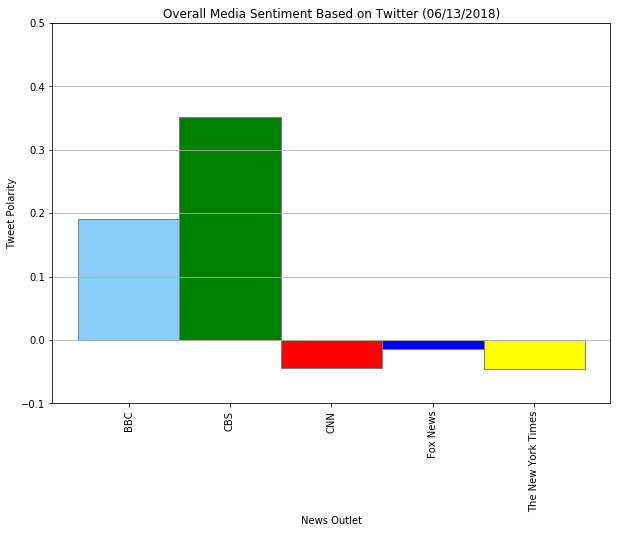

In [138]:
group_sentiment = sentiments_pd.groupby("User")
average_sentiment = group_sentiment["Compound"].mean()

average_sentiment.plot(kind="bar", width=1, align="center", edgecolor=["grey"]*len(average_sentiment), linewidth=1, color = ["lightskyblue", "green", "red", "blue", "yellow"], figsize=(10,7))
plt.ylim(-0.1, 0.5)
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Outlet")
plt.grid(True, axis="y")
plt.savefig("Fig2.png")
plt.show()